<a href="https://colab.research.google.com/github/MayJarung/IMAGE-PROCESSING/blob/main/Lab5_%E0%B8%82%E0%B9%89%E0%B8%AD1_%E0%B8%82%E0%B9%89%E0%B8%AD2_%E0%B8%82%E0%B9%89%E0%B8%AD3%E0%B9%81%E0%B8%9A%E0%B8%9A%E0%B8%97%E0%B8%B5%E0%B9%881.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras wrappers

  Preparing metadata (setup.py) ... done
Discarding https://files.pythonhosted.org/packages/81/fd/e3859be14b9feda7e11c719d7ffc5288e73664f9224be71fdb97cbd2d4ee/wrappers-0.1.9.tar.gz (from https://pypi.org/simple/wrappers/): Requested wrappers-684f4a29dc6e4afcb6e13bde165f54e1 from https://files.pythonhosted.org/packages/81/fd/e3859be14b9feda7e11c719d7ffc5288e73664f9224be71fdb97cbd2d4ee/wrappers-0.1.9.tar.gz has inconsistent name: expected 'wrappers', but metadata has 'wrappers-684f4a29dc6e4afcb6e13bde165f54e1'
  Preparing metadata (setup.py) ... done
Discarding https://files.pythonhosted.org/packages/a6/8b/631b7d172369efdb26fd34adb2f56233da40665b7b4e99dac11846b154fd/wrappers-0.1.8.tar.gz (from https://pypi.org/simple/wrappers/): Requested wrappers-912a5ee3ef064e188eb89ab32e767fe5 from https://files.pythonhosted.org/packages/a6/8b/631b7d172369efdb26fd34adb2f56233da40665b7b4e99dac11846b154fd/wrappers-0.1.8.tar.gz has inconsistent name: expected 'wrappers', but metadata has 'wrappers-912a5e

In [ ]:
!pip install keras==2.9.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.13.0 requires keras<2.14,>=2.13.1, but you have keras 2.9.0 which is incompatible.


5.1

In [ ]:
# Import Libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

from keras import Model, Input
import keras.utils as image
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
bgr_img2 = cv2.imread("/content/drive/MyDrive/ImageProcessing/WinkCat.jpg")

rgb_img2 = cv2.cvtColor(bgr_img2, cv2.COLOR_BGR2RGB)


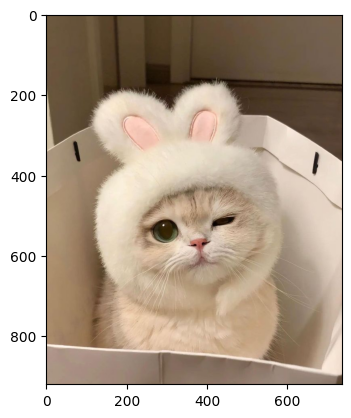

In [ ]:
plt.imshow(rgb_img2)
plt.show()

โค้ดด้านล่างก็จะเป็นการกำหนดตัวลด (scale factors) และเทคนิค interpolation (Interpolation methods) ที่จะถูกใช้ในการปรับขนาดรูปภาพ

In [ ]:
# Define resize factor
# Reduce_factors = [2, 4, 5, 7, 8, 10, 15] # อย่างน้อย 3 ค่า
Reduce_factors = [2, 7, 15] # อย่างน้อย 3 ค่า
Scale_factors = [1 / factor for factor in Reduce_factors]

# Define interpolation method
Inter_methods = [cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_AREA]
print(Inter_methods[1])

1


โค้ดด้านล่างจะเป็นการสร้างรูปภาพผลลัพธ์โดยการปรับขนาดรูปภาพต้นฉบับ (rgb_img2) ด้วย scale factor และ interpolation method ที่กำหนด โดยวน Loop ไปเรื่อยๆ

แสดงผลลัพธ์การปรับขนาดรูปภาพในรูปแบบตารางที่มีหลายแถวและหลายคอลัมน์ โดยแต่ละแถวแทนด้วย scale factor และแต่ละคอลัมน์แทนด้วย interpolation method ผลลัพธ์ที่แสดงคือรูปภาพที่ถูกปรับขนาดและใช้ interpolation method ตามค่าที่กำหนด

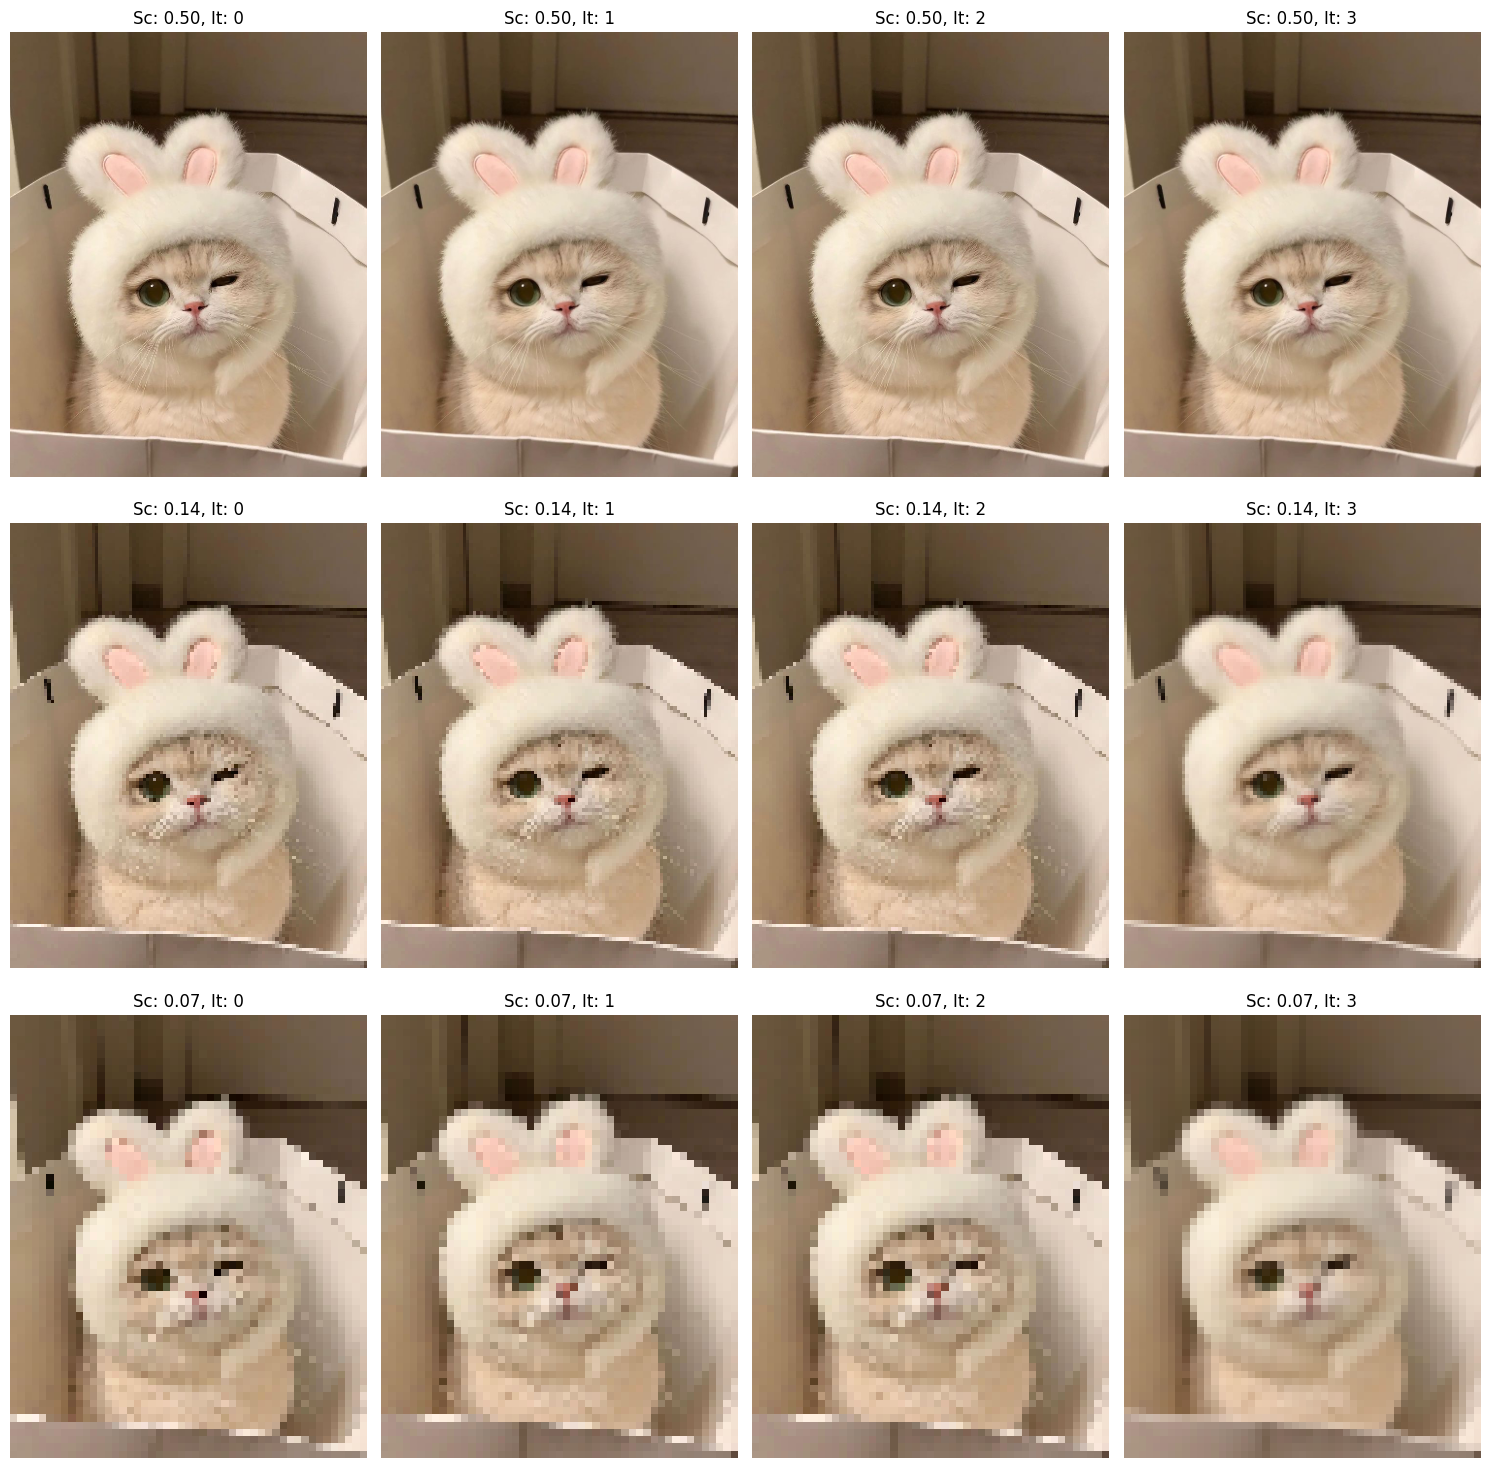

In [ ]:
# ปรับขนาดรูปภาพโดยใช้ scale factor และ interpolation method ที่กำหนด
result_images = []

for scale_factor in Scale_factors:
    row_images = []
    for inter_method in Inter_methods:
       # ปรับขนาดรูปภาพโดยใช้ scale factor และ interpolation method ที่กำหนด
        resized_img = cv2.resize(rgb_img2, None, fx=scale_factor, fy=scale_factor, interpolation=inter_method)
        row_images.append(resized_img)
    result_images.append(row_images)

# สร้างตารางเพื่อแสดงผลลัพธ์
num_rows = len(Scale_factors)
num_cols = len(Inter_methods)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for i in range(num_rows):
    for j in range(num_cols):
        axes[i, j].imshow(result_images[i][j])
        axes[i, j].set_title(f'Sc: {Scale_factors[i]:.2f}, It: {Inter_methods[j]}')
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

5.2


โค้ดนี้เป็นการใช้ Keras ImageDataGenerator เพื่อทำการ augment รูปภาพ โดยการปรับเปลี่ยนและเพิ่มความหลากหลายในชุดข้อมูลรูปภาพ

In [ ]:
# Define fill method
fill_method = ['constant', 'nearest', 'reflect', 'wrap']

In [ ]:
# Define parameters
Npic = 100  # จำนวนรูปภาพที่คุณต้องการสร้าง
rotation_range = 40  # ช่วงการหมุนภาพ (องศา)
width_shift_range = 0.2  # ช่วงการเลื่อนภาพในแนวนอน
height_shift_range = 0.2  # ช่วงการเลื่อนภาพในแนวตั้ง
shear_range = 0.2  # ช่วงการเบียดเอียง
zoom_range = 0.2  # ช่วงการซูม
horizontal_flip = True  # ทำการพลิกภาพแนวนอน (True/False)

โค้ดด่านล่าง ก็คือ การคำนวณหาค่า noise และเพิ่มค่า noise ในรูปภาพ โดยใช้ฟังก์ชัน add_gaussian_noise เพื่อสร้างค่า noise แบบ Gaussian noise และเพิ่มความค่า noise ในรูปภาพ rgb_img2 โดยใช้ค่า noise factor, noise mean, และ noise standard deviation ที่กำหนด

In [ ]:
def add_gaussian_noise(train_x):
  noise_mean = 0
  noise_std = 10
  noise_factor = 5
  train_x_noise = train_x + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=train_x.shape) )
  return train_x_noise

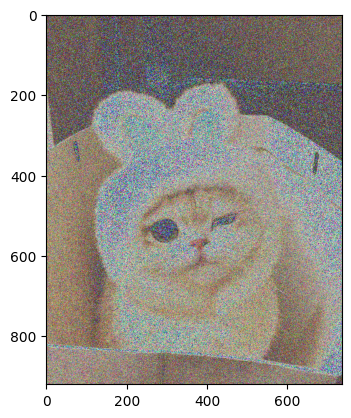

In [ ]:
rgb_img2_Noise = add_gaussian_noise(rgb_img2)

x = plt.imshow(rgb_img2_Noise.astype('uint8'))

In [ ]:
rgb_img2.shape

(920, 736, 3)

ใช้ np.expand_dims เพิ่มมิติให้กับ rgb_img2 เพื่อที่จะใช้กับ ImageDataGenerator

In [ ]:
data1 = np.expand_dims(rgb_img2, axis=0)
data1.shape

(1, 920, 736, 3)

In [ ]:
augImg = []

สร้าง ImageDataGenerator สำหรับแต่ละ fill method (คือ 'constant', 'nearest', 'reflect', 'wrap') ด้วยการกำหนดค่า rotation, shift, shear, zoom, และการพลิกภาพในแนวนอนตามพารามิเตอร์ที่กำหนด. ฟังก์ชัน add_gaussian_noise ถูกใช้เป็น preprocessing function ที่จะถูกนำมาใช้กับรูปภาพก่อนที่จะถูก augment

ใช้ ImageDataGenerator ที่ถูกสร้างขึ้น เพื่อสร้าง batch ของรูปภาพ โดยในที่นี้กำหนด batch_size เป็น 1 รูปภาพเพียงรูปเดียว

สร้างรูปภาพที่ถูก augment ในลูป for กำหนดให้โค้ดสร้างรูปภาพที่ถูก augment จำนวน Npic รูป และเก็บรูปภาพที่ได้ลงในลิสต์ augImg

In [ ]:
# Define ImageDataGenerator with parameters
for m in fill_method:
    datagen = ImageDataGenerator(rotation_range=rotation_range,
                                 width_shift_range=width_shift_range,
                                 height_shift_range=height_shift_range,
                                 shear_range=shear_range,
                                 zoom_range=zoom_range,
                                 horizontal_flip=horizontal_flip,
                                 preprocessing_function = add_gaussian_noise,
                                 fill_mode = m)

# Creates our batch of one image
pic = datagen.flow(data1, batch_size =1)
# Random generate transformed images and write to a video file
for i in range(1, Npic):
    batch = pic.next()
    im_result = batch[0].astype('uint8')
    augImg.append(im_result)

แสดงผลลัพธ์ รูปภาพที่ถูก augment ถูกแสดงผลบนกราฟขนาด 8x4 โดยแต่ละรูปภาพมาจาก augImg และให้แสดงเป็นรูปภาพ 8x4

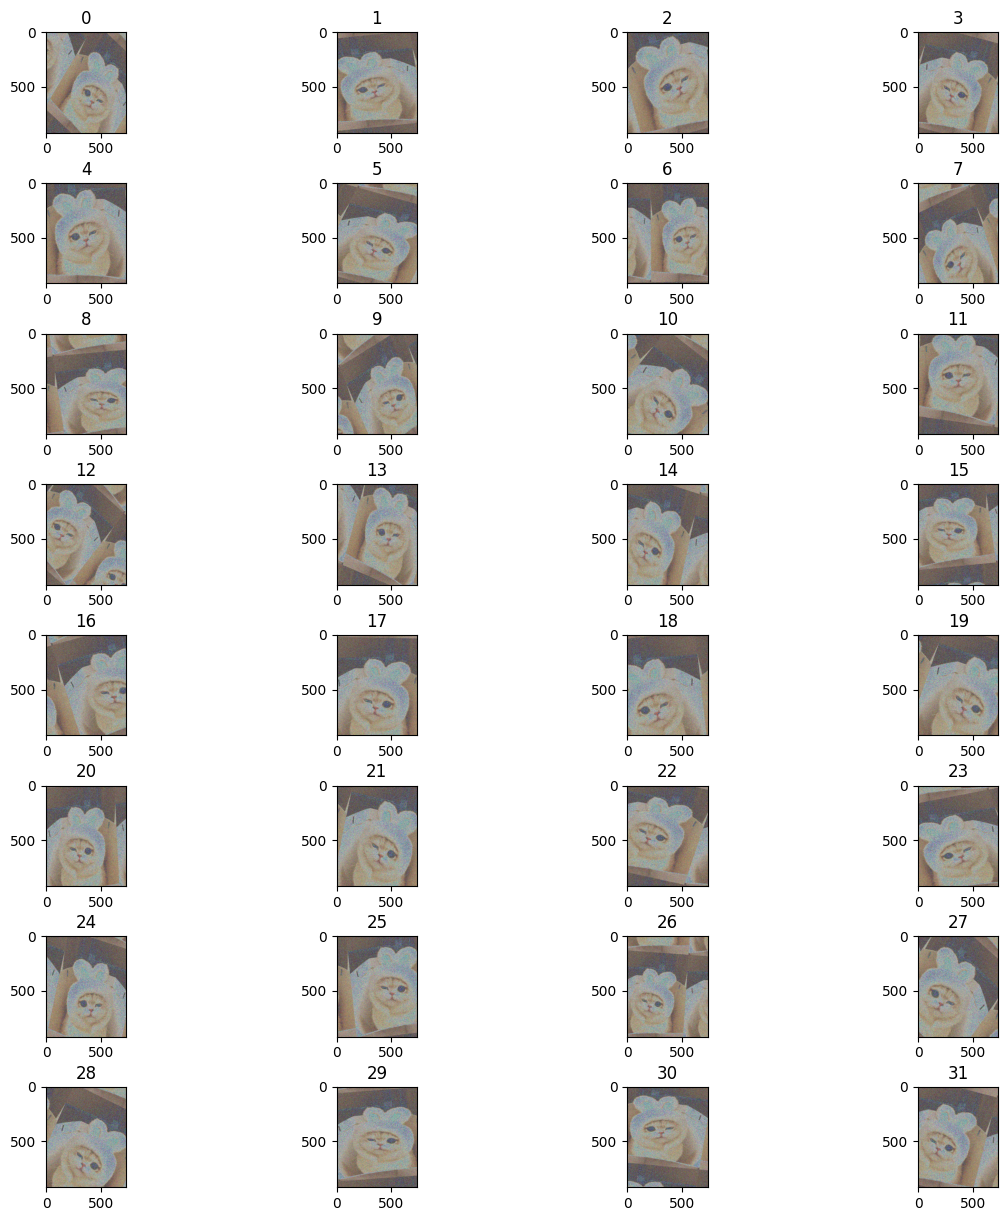

In [ ]:
fig, axs = plt.subplots(8,4, figsize=(15, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i in range(32):
    axs[i].imshow(augImg[i],cmap='viridis')
    axs[i].set_title(i)

5.3

In [ ]:
# Read image from fashion_mnist dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data() # load images from dataset
x_train = x_train/255.0  # normalized image intensity
x_test = x_test/255.0    # normalized image intensity
x_train, x_test= train_test_split(x_train, random_state=42, test_size=0.2) # create train data, test data
x_train, x_val = train_test_split(x_train, random_state=42, test_size=0.3) # create train data, validation data

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
x_train.shape, x_test.shape

((33600, 28, 28), (12000, 28, 28))

ปรับรูปแบบข้อมูล โดยทำการเปลี่ยนรูปแบบของข้อมูลรูปภาพเพื่อให้เหมาะกับการใช้ในโมเดล autoencoder ซึ่งโมเดลนี้คาดหวังข้อมูลรูปภาพในรูปแบบ 4 มิติ โดยเพิ่มมิติสุดท้ายที่เท่ากับ 1 เพื่อระบุจำนวนของช่องสี (channels) ซึ่งในกรณีนี้เป็นขาว-ดำ

แปลงค่าข้อมูลรูปภาพเป็นชนิดข้อมูลที่เหมาะสำหรับการใช้ในโมเดล โดยใช้ astype('float32') ในที่นี้ทำให้ค่าข้อมูลเป็นทศนิยม 32 บิต

In [ ]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
x_val = x_val.reshape((x_val.shape[0], 28, 28, 1))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_val = x_val.astype('float32')

In [ ]:
x_train.shape, x_test.shape , x_val.shape

((33600, 28, 28, 1), (12000, 28, 28, 1), (14400, 28, 28, 1))

คำนวณหาค่า noise และเพิ่มค่า noise ในรูปภาพ โดยใช้ฟังก์ชัน add_gaussian_noise

กำหนดค่า
  noise_mean = 0
  noise_std = 0.3
  noise_factor = 0.2

In [ ]:
# Prepare Gaussian Noise Function
def add_gaussian_noise(train_x):
  noise_mean = 0
  noise_std = 0.3
  noise_factor = 0.2
  train_x_noise = train_x + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=train_x.shape) )
  return train_x_noise

In [ ]:
for m in fill_method:
    datagen = ImageDataGenerator(rotation_range=rotation_range,
                                 width_shift_range=width_shift_range,
                                 height_shift_range=height_shift_range,
                                 shear_range=shear_range,
                                 zoom_range=zoom_range,
                                 horizontal_flip=horizontal_flip,
                                 preprocessing_function = add_gaussian_noise,
                                 fill_mode = m)

x_batch = datagen.flow(x_train, batch_size = 1)

In [ ]:
x_test_noisy = []
x_train_noisy = []
x_val_noisy = []

สร้างชุดข้อมูลรูปภาพที่มี noise และ augmentation โดยการใช้ ImageDataGenerator และฟังก์ชัน add_gaussian_noise โดยจะได้ x_train_noisy, x_test_noisy, x_val_noisy ออกมา

In [ ]:
# Define ImageDataGenerator with

for image in x_train:
    # Expand dimensions to (1, 28, 28, 1)
    #image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    x_train_noisy.append(augmented_image)

for image in x_test:
    # Expand dimensions to (1, 28, 28, 1)
    #image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    x_test_noisy.append(augmented_image)

for image in x_val:
    # Expand dimensions to (1, 28, 28, 1)
    #image = np.expand_dims(image, axis=-1)
    augmented_image = datagen.flow(np.array([image]), batch_size=1).next()[0]
    x_val_noisy.append(augmented_image)

x_train_noisy = np.array(x_train_noisy)
x_test_noisy = np.array(x_test_noisy)
x_val_noisy = np.array(x_val_noisy)

In [ ]:
x_train_noisy.shape

(33600, 28, 28, 1)

แสดงผลรูปภาพเปรียบเทียบรูปภาพหลังการทำ augmentation และรูปภาพปกติในชุดข้อมูล x_train, x_test และ x_val

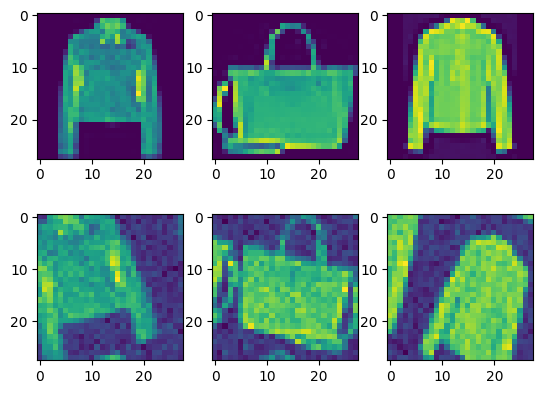

In [ ]:
fig1, axs1 = plt.subplots(2, 3)
axs1[0, 0].imshow(x_train[0])
axs1[1, 0].imshow(x_train_noisy[0])
axs1[0, 1].imshow(x_test[0])
axs1[1, 1].imshow(x_test_noisy[0])
axs1[0, 2].imshow(x_val[0])
axs1[1, 2].imshow(x_val_noisy[0])

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, losses

กำหนด Optimizer กับ learning rate

In [ ]:
optimizer='adam'
learning_rate=0.0003

สร้างโมเดล autoencoder

In [ ]:
input_img = Input(shape=(28,28,1))
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(input_img)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
x3 = MaxPool2D((2, 2), strides=(2, 2))(x2)
x4 = Conv2D(64, (3, 3), activation='relu', padding='same')(x3)
x5 = Conv2D(64, (3, 3), activation='relu', padding='same')(x4)
x6 = UpSampling2D((2, 2))(x5)
x7 = Conv2D(128, (3, 3), activation='relu', padding='same')(x6)
x8 = Conv2D(256, (3, 3), activation='relu', padding='same')(x7)
x9 = Conv2D(1, (3, 3), padding='same')(x8)
# Compile the model
autoencoder = Model(input_img, x9)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), loss=losses.MeanSquaredError())

/usr/local/lib/python3.10/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


กำหนด batch size กับ epoch

In [ ]:
bs = 512
eps = 70

เป็นกระบวนการการฝึกโมเดล autoencoder ที่ใช้ augmentation ในการเพิ่มความหลากหลายให้กับข้อมูลและการฝึกโมเดลให้สามารถรู้จักและลดความเป็นรบกวนในรูปภาพได้ดียิ่งขึ้น โดยมีการติดตามและหยุดการฝึกเมื่อค่าความสูญเสียหยุดการดีขึ้น

In [ ]:
callback = EarlyStopping(monitor='loss', patience=10)
history = autoencoder.fit_generator( datagen.flow(x_train, x_train, batch_size=bs),
                                      epochs=eps, steps_per_epoch = x_train.shape[0]//bs,
                                      validation_data=(x_val_noisy, x_val),
                                      callbacks=[callback],verbose=1)
# test batch_size , epoch, learning_rate,

<ipython-input-36-f4b7ec38664c>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = autoencoder.fit_generator( datagen.flow(x_train, x_train, batch_size=bs),


Epoch 1/70
65/65 [==============================] - 48s 484ms/step - loss: 0.0831 - val_loss: 0.0702
Epoch 2/70
65/65 [==============================] - 24s 365ms/step - loss: 0.0671 - val_loss: 0.0645
Epoch 3/70
65/65 [==============================] - 23s 354ms/step - loss: 0.0623 - val_loss: 0.0603
Epoch 4/70
65/65 [==============================] - 26s 398ms/step - loss: 0.0585 - val_loss: 0.0574
Epoch 5/70
65/65 [==============================] - 25s 376ms/step - loss: 0.0562 - val_loss: 0.0552
Epoch 6/70
65/65 [==============================] - 24s 368ms/step - loss: 0.0544 - val_loss: 0.0536
Epoch 7/70
65/65 [==============================] - 26s 392ms/step - loss: 0.0527 - val_loss: 0.0520
Epoch 8/70
65/65 [==============================] - 26s 396ms/step - loss: 0.0517 - val_loss: 0.0511
Epoch 9/70
65/65 [==============================] - 23s 354ms/step - loss: 0.0507 - val_loss: 0.0502
Epoch 10/70
65/65 [==============================] - 24s 361ms/step - loss: 0.0500 - val_lo

Plot graph to show training and validation loss

สร้างกราฟเพื่อแสดงค่าความสูญเสีย (loss) ของโมเดลในระหว่างการฝึก (training) และการตรวจสอบ (validation) ในแต่ละรอบการฝึก (epoch) เพื่อติดตามประสิทธิภาพของโมเดล กราฟสามารถช่วยในการวิเคราะห์ความสามารถในการฝึกของโมเดลโดยแสดงถึงการลดความสูญเสียของโมเดลในระหว่างเวลา

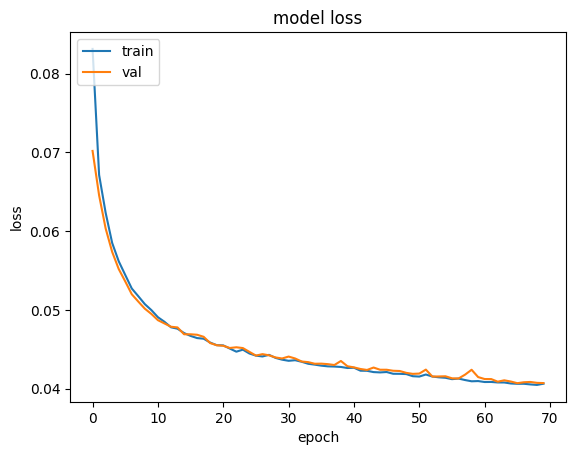

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

โค้ดด้ดานล่าง เป็นการใช้โมเดล autoencoder เพื่อทำการทำนาย (predict) รูปภาพต้นฉบับจากรูปภาพที่มีความเป็นรบกวน (noisy image) ในชุดข้อมูลทดสอบ (x_test_noisy) เป็นขั้นตอนสุดท้ายในกระบวนการใช้โมเดล autoencoder ในการลดความเป็นรบกวนในรูปภาพ

ผลลัพธ์ที่ได้จากขั้นตอนนี้คือรูปภาพต้นฉบับที่ผ่านการลบ noise และเปลี่ยนแปลงให้เหมือนกับรูปภาพต้นฉบับโดยอยู่ในตัวแปร predictions_test

In [ ]:
predictions_test = autoencoder.predict_generator(x_test_noisy)

<ipython-input-38-ff09df9e1d8a>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions_test = autoencoder.predict_generator(x_test_noisy)


plot รูปภาพ เปรียบเทียบ Original, Noisy, and Predicted images

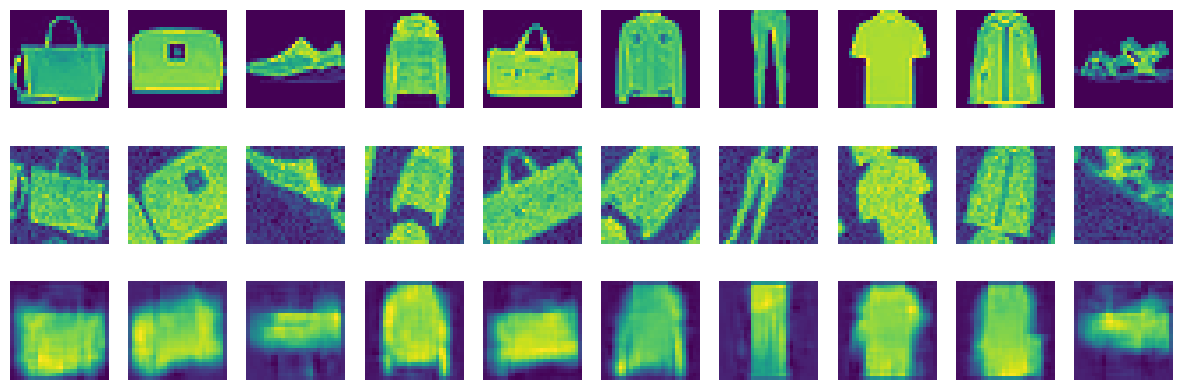

In [ ]:
fig1, axs1 = plt.subplots(3, 10,  figsize=(15, 5))
axs1[0, 0].imshow(x_test[0])
axs1[1, 0].imshow(x_test_noisy[0])
axs1[2, 0].imshow(predictions_test[0])
axs1[0, 1].imshow(x_test[1])
axs1[1, 1].imshow(x_test_noisy[1])
axs1[2, 1].imshow(predictions_test[1])
axs1[0, 2].imshow(x_test[2])
axs1[1, 2].imshow(x_test_noisy[2])
axs1[2, 2].imshow(predictions_test[2])
axs1[0, 3].imshow(x_test[3])
axs1[1, 3].imshow(x_test_noisy[3])
axs1[2, 3].imshow(predictions_test[3])
axs1[0, 4].imshow(x_test[4])
axs1[1, 4].imshow(x_test_noisy[4])
axs1[2, 4].imshow(predictions_test[4])
axs1[0, 5].imshow(x_test[5])
axs1[1, 5].imshow(x_test_noisy[5])
axs1[2, 5].imshow(predictions_test[5])
axs1[0, 6].imshow(x_test[6])
axs1[1, 6].imshow(x_test_noisy[6])
axs1[2, 6].imshow(predictions_test[6])
axs1[0, 7].imshow(x_test[7])
axs1[1, 7].imshow(x_test_noisy[7])
axs1[2, 7].imshow(predictions_test[7])
axs1[0, 8].imshow(x_test[8])
axs1[1, 8].imshow(x_test_noisy[8])
axs1[2, 8].imshow(predictions_test[8])
axs1[0, 9].imshow(x_test[9])
axs1[1, 9].imshow(x_test_noisy[9])
axs1[2, 9].imshow(predictions_test[9])

for ax in axs1.flatten():
    ax.axis('off')
